In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Data Loading and Cleaning

In [2]:
df = pd.read_csv('../DataSets/HR_Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Drop unnecessary columns
df=df.drop(['Education','MaritalStatus','StockOptionLevel'],axis=1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,1,2,...,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,1,2,3,...,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,1,4,4,...,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,1,5,4,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,7,1,...,3,4,80,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,1,2061,3,...,3,3,80,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,1,2062,4,...,3,1,80,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,1,2064,2,...,4,2,80,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,1,2065,4,...,3,4,80,17,3,2,9,6,0,8


# Descriptive Analysis

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,80.0,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.0,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,80.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,80.0,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,80.0,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,80.0,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,80.0,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [7]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [8]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [9]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [10]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

# Visualization 

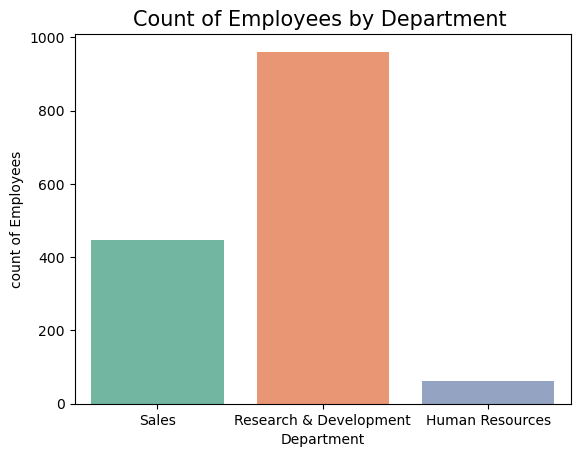

In [11]:
# Count of Employees by Department 
sb.countplot(x=df.Department , palette='Set2')
plt.title('Count of Employees by Department ', fontsize=15)
plt.xlabel('Department')
plt.ylabel('count of Employees')
plt.show()


#### Majority of employees are in the research and development, followed by sales and human resource.

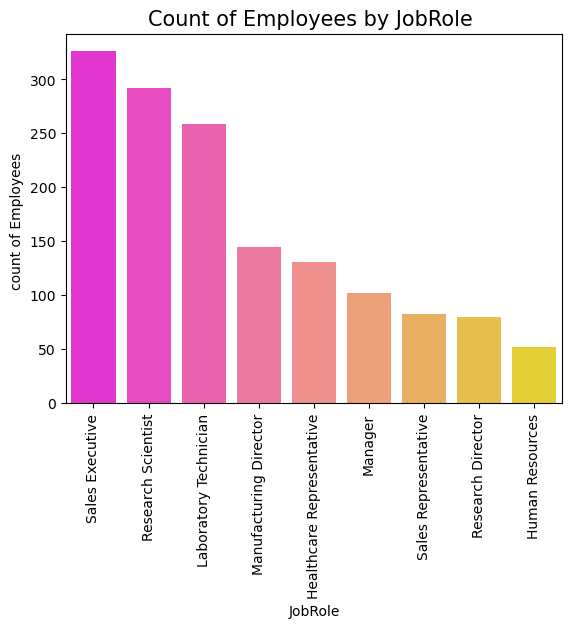

In [12]:
# Count of Employees by JobRole
sb.countplot(x=df.JobRole , palette='spring')
plt.title('Count of Employees by JobRole ', fontsize=15)
plt.xlabel('JobRole')
plt.ylabel('count of Employees ')
plt.xticks(rotation=90)
plt.show()

#### The most common JobRole is sales excetive, with (326 Employees)

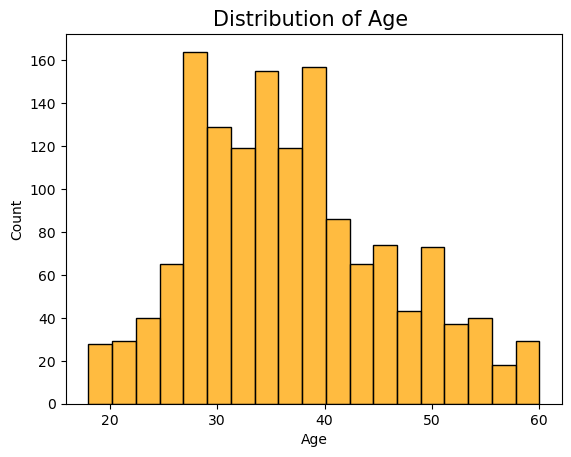

In [13]:
# Distribution of Age 
sb.histplot(df.Age , color='orange')
plt.title('Distribution of Age ', fontsize=15)
plt.show()

#### Peaks in certain Age range are 30 to 40 might indicate a concentration of employees in specific carrer stages.

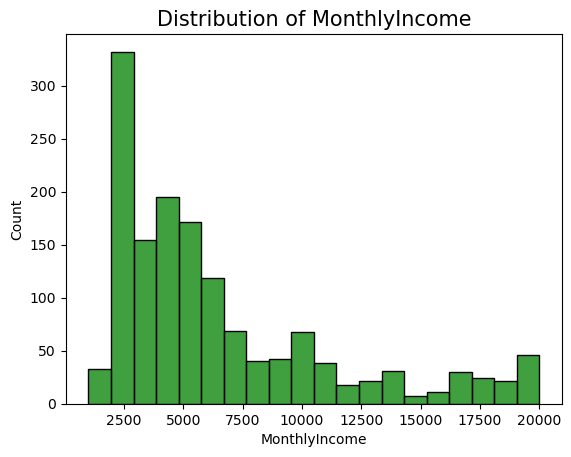

In [14]:
# Distribution of Monthlyincome 
sb.histplot(df.MonthlyIncome, color='green')
plt.title('Distribution of MonthlyIncome',fontsize=15)
plt.show()

#### MonthlyIncome: The distribution may show a right-skewed pattern, with a small number of employees earning significant higher salaries.

In [15]:
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,NaN,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,NaN,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,NaN,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,NaN,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,NaN,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,NaN,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,NaN,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,NaN,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,NaN,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,NaN,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


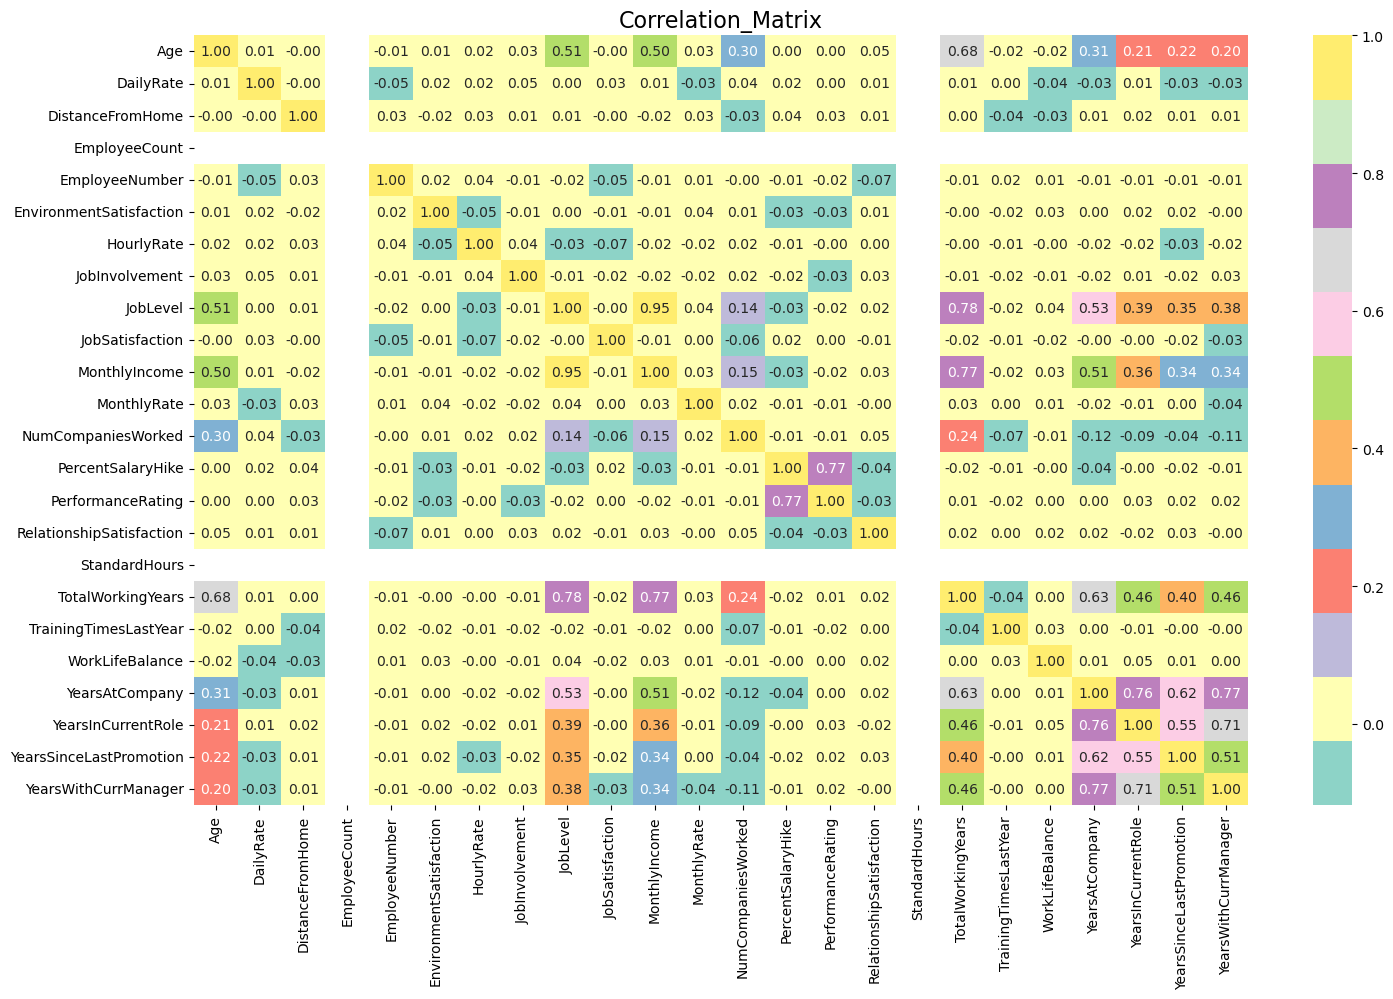

In [16]:
plt.figure(figsize=(17,10))
sb.heatmap(correlation_matrix,annot=True, cmap='Set3',fmt='.2f',cbar=True)
plt.title('Correlation_Matrix', fontsize=16)
plt.show()

#### The job level and Monthly income of employees are showing perfect positive Relation andthis job level are showing strong relation with total working year of employees alsoshow moderate relation with age.
#### The Age and Total Working Year of employees are showing strong positive relation.

# Attrition Analysis


In [17]:
df[(df.Attrition=='Yes')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,1,2,...,3,1,80,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,1,4,4,...,3,2,80,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,Life Sciences,1,19,3,...,3,2,80,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,Life Sciences,1,27,3,...,4,2,80,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,Medical,1,31,2,...,3,3,80,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,Marketing,1,2023,4,...,3,1,80,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,Medical,1,2027,1,...,3,2,80,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,Technical Degree,1,2032,4,...,3,4,80,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,Life Sciences,1,2044,2,...,3,4,80,12,3,3,6,3,0,1


In [18]:
df[(df.Attrition=='No')]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,1,2,3,...,4,4,80,10,3,3,10,7,1,7
3,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,1,5,4,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,7,1,...,3,4,80,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,Life Sciences,1,8,4,...,3,3,80,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,Medical,1,10,3,...,4,1,80,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Medical,1,2061,3,...,3,3,80,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,Medical,1,2062,4,...,3,1,80,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,Life Sciences,1,2064,2,...,4,2,80,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,Medical,1,2065,4,...,3,4,80,17,3,2,9,6,0,8


#### Employees who left (Attrition=Yes) may show pattern such as lower job satisfaction shorter tenure, or higher overtime compared to those who stayed.


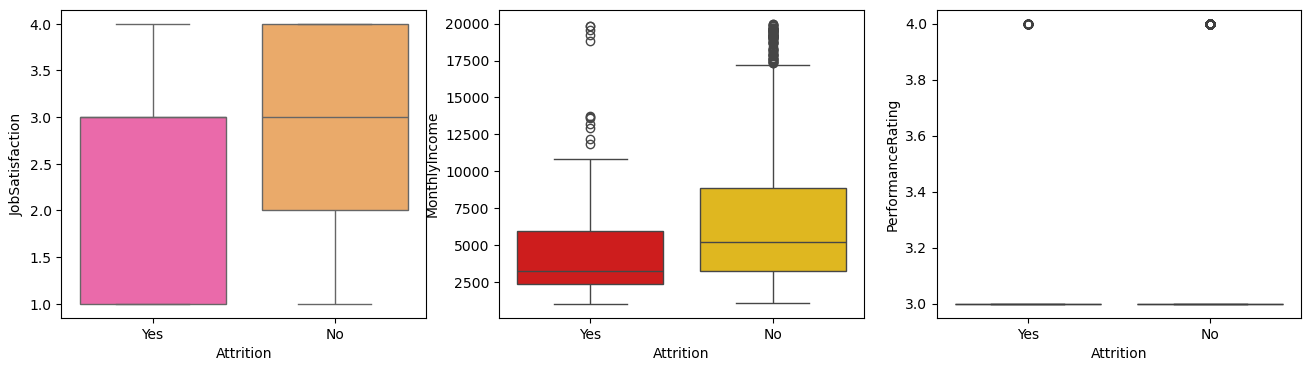

In [31]:
 # Creat Subplots

plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
sb.boxplot(x=df.Attrition, y=df.JobSatisfaction,palette='spring')

plt.subplot(1,3,2)
sb.boxplot(x=df.Attrition, y=df.MonthlyIncome, palette='hot')

plt.subplot(1,3,3)
sb.boxplot(x=df.Attrition, y=df.PerformanceRating,)
plt.show()



## JobSatisfaction
#### Employees with lower job satisfaction (closer to 1) are more likely to leave the    company, as shown by the distribution for (Attrition = Yes).
#### Higher job satisfaction (closer to 4) is associated with employees who stay (Attrition = No), suggesting that improving job satisfaction could reduce attrition rates.

## MonthlyIncome
#### Employees with lower monthly income are more likely to leave the company (Attrition = Yes).
#### Employees with higher monthly income are predominantly in the "Attrition = No" category, suggesting that competitive salaries improve retention.

## PerformanceRating
#### Performance ratings seem to be uniformly distributed across both "Attrition = Yes" and "Attrition = No" categories, suggesting that performance ratings may not be a significant factor influencing employee attrition.
#### If most employees have a similar performance rating, it may indicate a lack of differentiation in evaluations, limiting insights into the relationship with attrition.


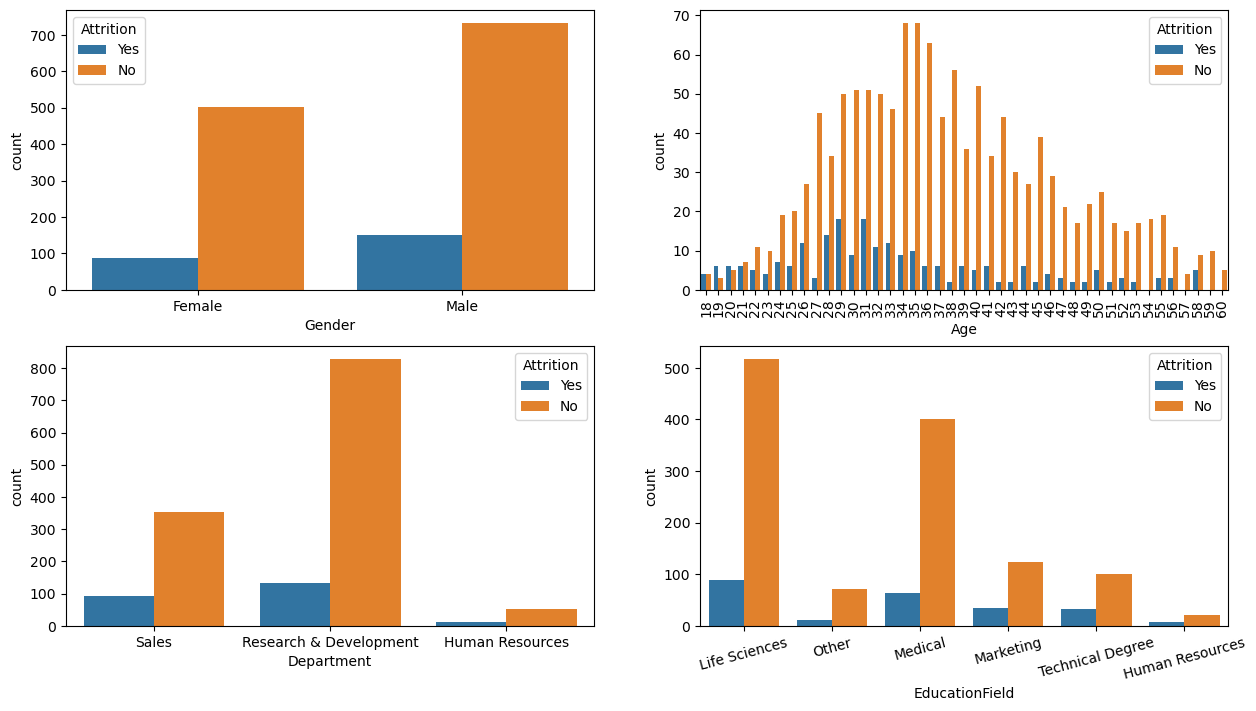

In [27]:
# create subplot
fig=plt.figure(figsize=(15,8))


x1=fig.add_subplot(2,2,1)

sb.countplot(data=df,x='Gender', hue='Attrition')
plt.xticks(rotation=0)

x1=fig.add_subplot(2,2,2)

sb.countplot(data=df,x='Age', hue='Attrition')
plt.xticks(rotation=90)

x1=fig.add_subplot(2,2,3)

sb.countplot(data=df,x='Department', hue='Attrition')
plt.xticks(rotation=0)

x1=fig.add_subplot(2,2,4)

sb.countplot(data=df,x='EducationField', hue='Attrition')
plt.xticks(rotation=15)
plt.show()


# Gender:
### based Attrition: Male employees have higher retention compared to female employees.
    
# Age:
### Age wise Trends: Younger employees show higher attrition rates compared to older ones.

# Department:
### Departmental Variations: The Research & Development department has higher retention compared to Sales and HR.

# EducationField:
### Educational Influence: Employees in technical fields and life sciences exhibit higher retention compared to other education fields.